In [1]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn import cross_validation

C:\Users\Prateek Jain\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
dataset = datasets.load_breast_cancer()

In [3]:
dataset.data.shape

(569, 30)

In [6]:
xtrain,xtest,ytrain,ytest = cross_validation.train_test_split(dataset.data,dataset.target)

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=7)

In [26]:
KNN.fit(xtrain,ytrain)
ypred = KNN.predict(xtest)
KNN.score(xtest,ytest)

0.8951048951048951

# Finding the value of k by plotting

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [86]:
y=[]
x=[]
for i in range(1 ,16, 2) :
    x.append(i)
    KNN = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(KNN,xtrain,ytrain,cv=KFold(shuffle=True,n_splits=10))
    y.append(score.mean())


import matplotlib.pyplot as plt   
plt.plot(x,y)    

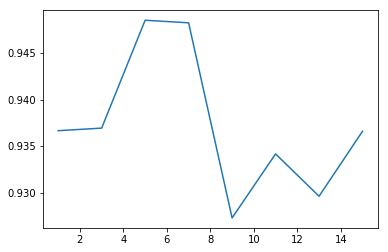

In [87]:
plt.show()

In [72]:
k = x[y.index(max(y))]


13

In [73]:
KNN = KNeighborsClassifier(n_neighbors=k)
KNN.fit(xtrain,ytrain)
ypred = KNN.predict(xtest)
KNN.score(xtest,ytest)

0.91608391608391604

# Accuracy

In [81]:
true_pos = ((ypred == 1) & (ytest == 1)).sum()
true_pos

89

In [82]:
false_pos = ((ypred == 1) & (ytest == 0)).sum()
false_pos

10

In [83]:
false_neg = ((ypred == 0) & (ytest == 1)).sum()
false_neg

2

In [84]:
true_neg = ((ypred == 0) & (ytest == 0)).sum()
true_neg

42

In [85]:
from sklearn.metrics import confusion_matrix as cm
a = cm(ytest,ypred)
a

array([[42, 10],
       [ 2, 89]])